<a href="https://colab.research.google.com/github/Alok650/Alok/blob/master/CNN_ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network**

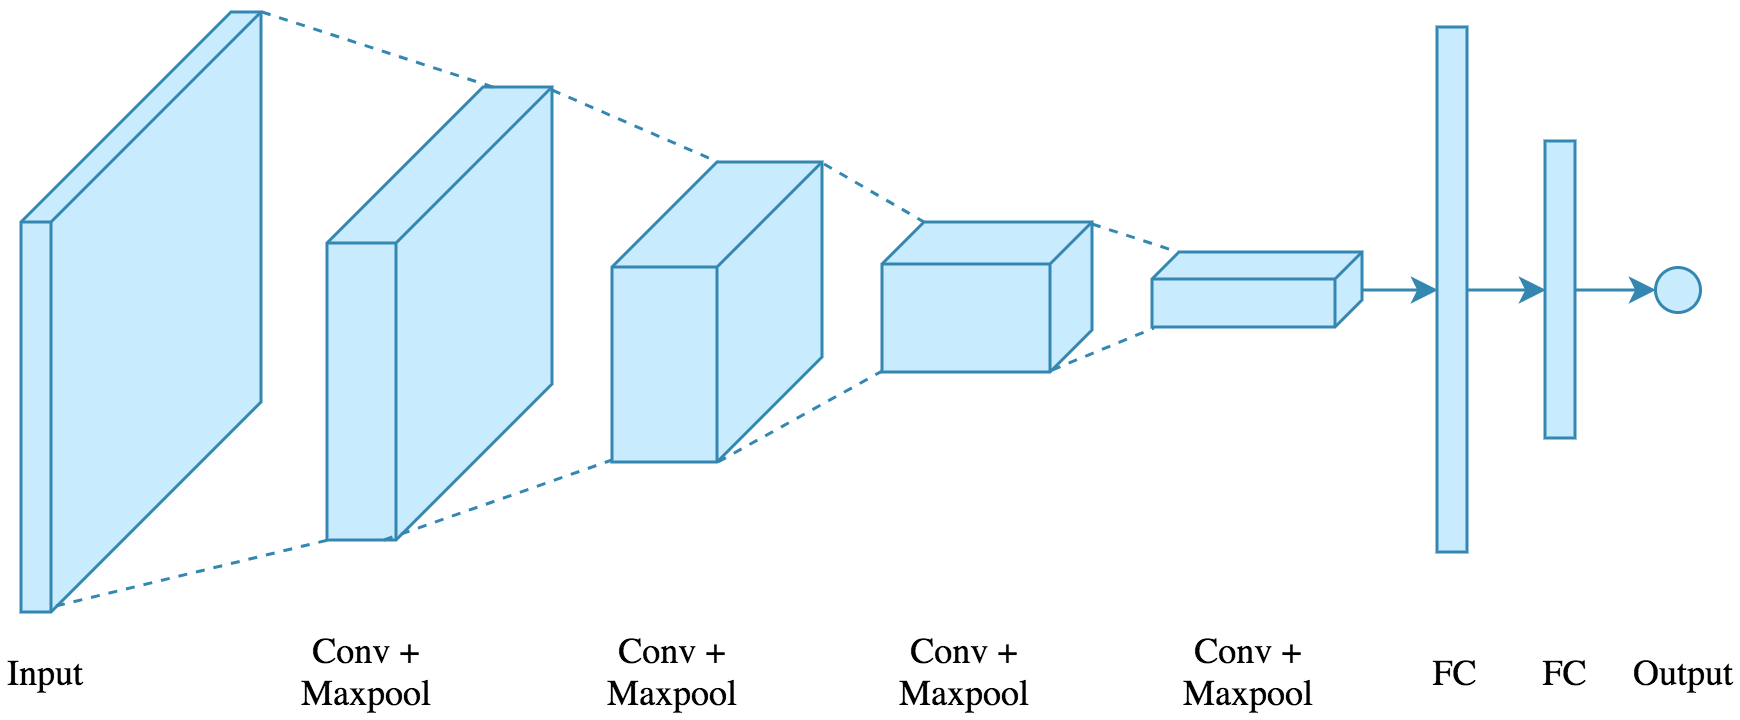

*This project involves training a simple CNN to classify CIFAR images. It uses the Keras Sequential API.*

## Importing TensorFlow


*Tensorflow is a low level API.*

In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

*CIFAR dataset contains 60,000 color images in 10 different classes. The dataset has been divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and hence, they have no overlap.*

*Keras is a high level API used to write shorter codes (Approx. 1000 lines of python code can be written by using just 5 functions of Keras). It is a subset of TensorFlow. *

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixel values to be between 0 and 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


# Verify the data

*Plotting the first 100 images from the training set and displaying class label below each image.*

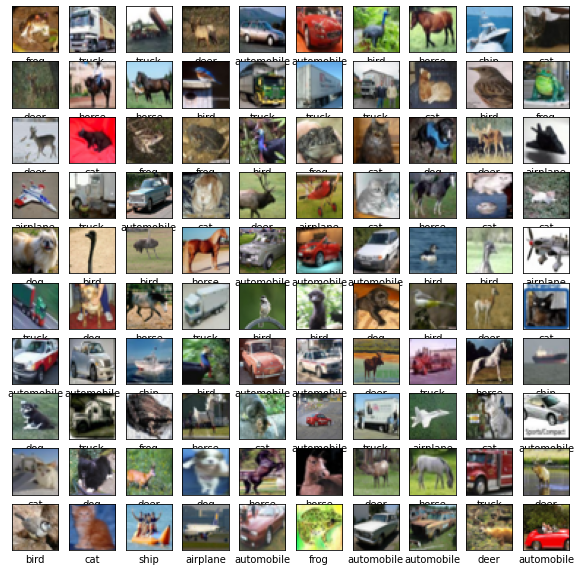

In [13]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck']

plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  #The CIFAR labels is an uni-directional array.
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Creating the convolutional base

The convolutional base uses a common pattern : a stack of **Conv2D** and **MaxPooling2D** layers. 

*As input, CNN takes tensors of the shape (height, width, color channels), but ignores the batch size. *


1.   Color channels : (R,G,B)
2.   Input shapes of CIFAR : (32,32,3) 



In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation ='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

# Architecture of Model 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


*The summary shows that the ouput of Conv2D and MaxPooling 2D layer is a 3D tensor (with height, width, color channels) The height and width will shrink as we go deeper into the CNN. As the width decreases, we can computationally add more output channels in each Conv2D layer.*

## Addition of Dense Layers

To complete the model, we will fee the last output tensor from the convolution base (4,4,64) into more Dense layers to perform classification. Dense layers take 1D vectors as input, however currently our output is in 3D form. As a result, we need to unroll the 3D into 1D and then add the additional dense layers at the top. 

CIFAR has 10 output classes.Hence, we use final Dense layer with 10 outputs. 

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

# **Complete architecture of our classfication Model :**

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

The summary above shows that our (4,4,64) outputs were flattened into 1D vectors of shape (1024) before going through the final 2 Dense layers.

# **Compilation and Training the Model**

In [20]:
model.compile(optimizer = 'adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs= 10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 39s 4ms/step - loss: 1.7683 - accuracy: 0.3408 - val_loss: 1.2223 - val_accuracy: 0.5624
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2021 - accuracy: 0.5714 - val_loss: 1.0796 - val_accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0251 - accuracy: 0.6374 - val_loss: 1.0059 - val_accuracy: 0.6408
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9238 - accuracy: 0.6733 - val_loss: 0.9437 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8449 - accuracy: 0.7017 - val_loss: 0.8857 - val_accuracy: 0.6899
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7852 - accuracy: 0.7212 - val_loss: 0.8770 - val_accuracy: 0.6938
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7398 - accuracy: 0.7412 - val_loss: 0.8984 - val_accuracy

# Evaluation of the Model

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.8528 - accuracy: 0.7162


In [22]:
print(test_acc)

0.7161999940872192


The CNN has a test accuracy of 71%.